In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [19]:
data = pd.read_csv('clean_tayara_cars.csv')


In [37]:
data['log_price'] = np.log10(data['price'])
data['log_Kms_Driven'] = np.log10(data["Kms_Driven"])
data=data[data['Horse_pow']<20]



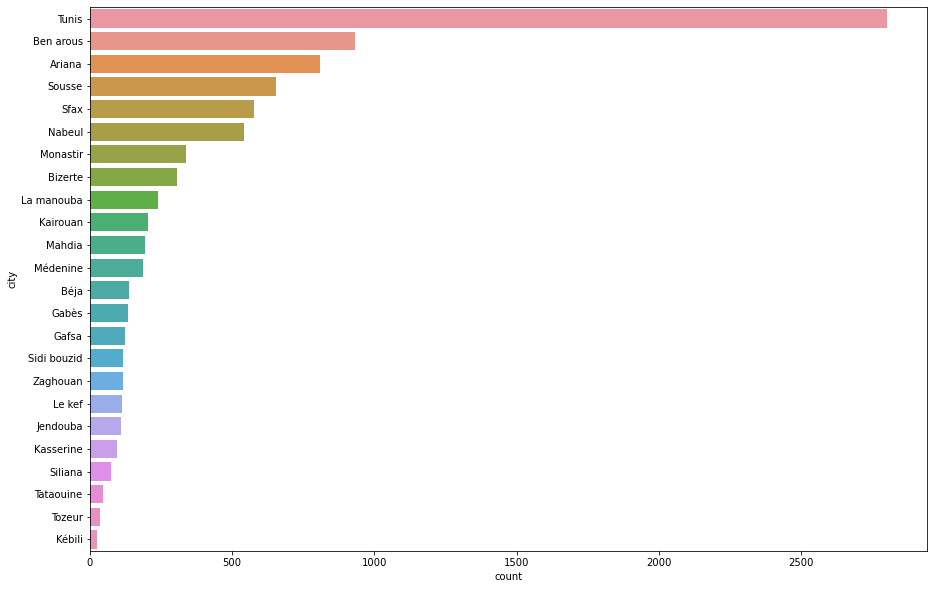

In [21]:

plt.figure(figsize=(15,10))
sns.countplot(y='city', data=data, order=data.city.value_counts().index, )



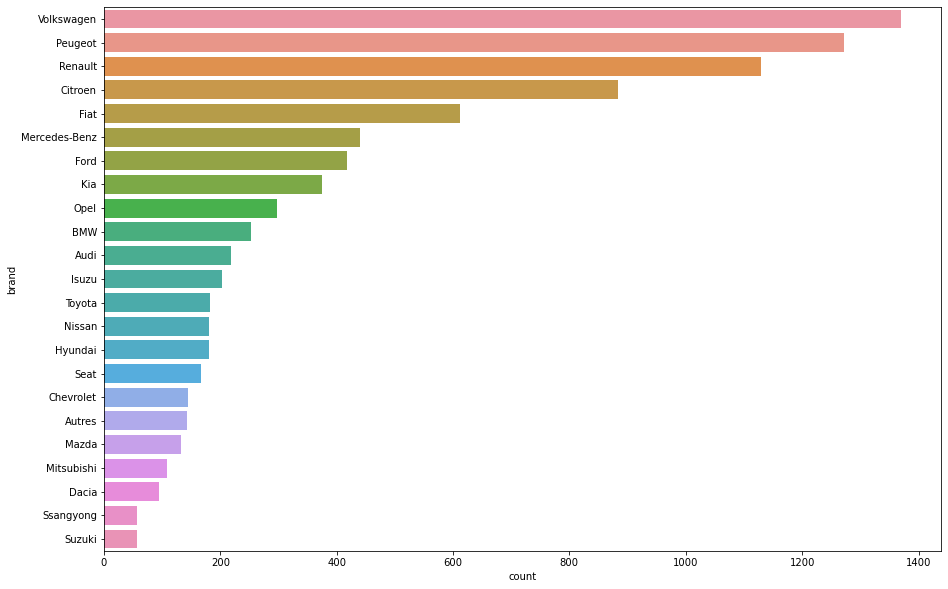

In [22]:
plt.figure(figsize=(15,10))
sns.countplot(y='brand', data=data, order=data.brand.value_counts().index)


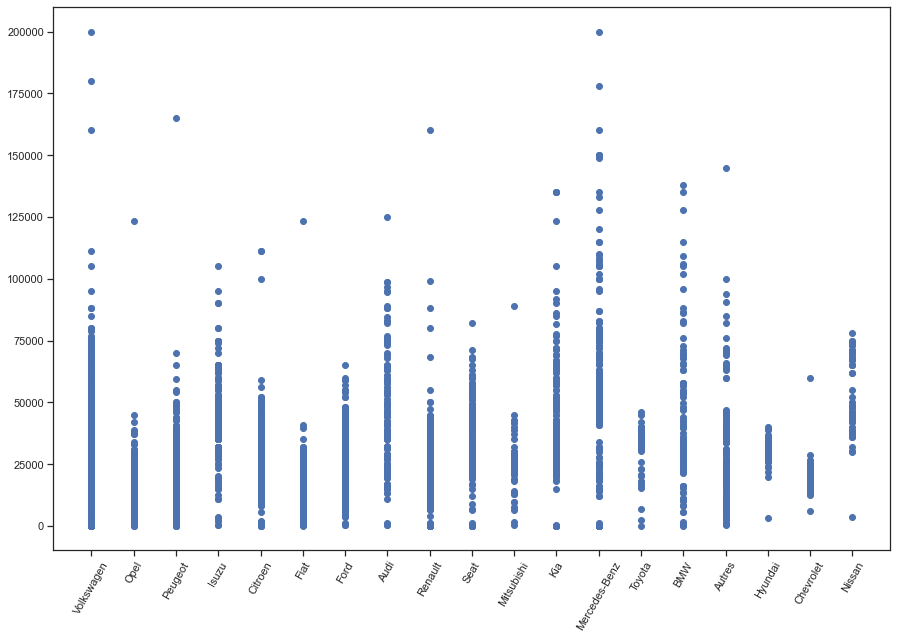

In [204]:
plt.figure(figsize=(15,10))
plt.scatter(data['brand'], data['price'])

plt.xticks(rotation=60)
plt.show()

    

In [23]:
data.describe()

,Unnamed: 0,Kms_Driven,year,price,Horse_pow,nb_year,log_price
count,8915.000000,8.915000e+03,8915.000000,8915.000000,8915.000000,8915.000000,8915.000000
mean,5092.639596,5.222040e+06,2007.783062,28185.213797,6.099159,13.216938,4.318979
std,2964.241997,9.333119e+07,8.693678,21192.545115,2.192813,8.693678,0.411568
min,0.000000,1.000000e+00,1900.000000,100.000000,1.000000,0.000000,2.000000
25%,2535.500000,3.000000e+02,2003.000000,15000.000000,5.000000,7.000000,4.176091
50%,5065.000000,1.070000e+05,2010.000000,24000.000000,5.000000,11.000000,4.380211
75%,7659.500000,2.000000e+05,2014.000000,35000.000000,7.000000,18.000000,4.544068
max,10253.000000,2.147484e+09,2021.000000,200000.000000,19.000000,121.000000,5.301030


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]),
 <a list of 19 Text major ticklabel objects>)

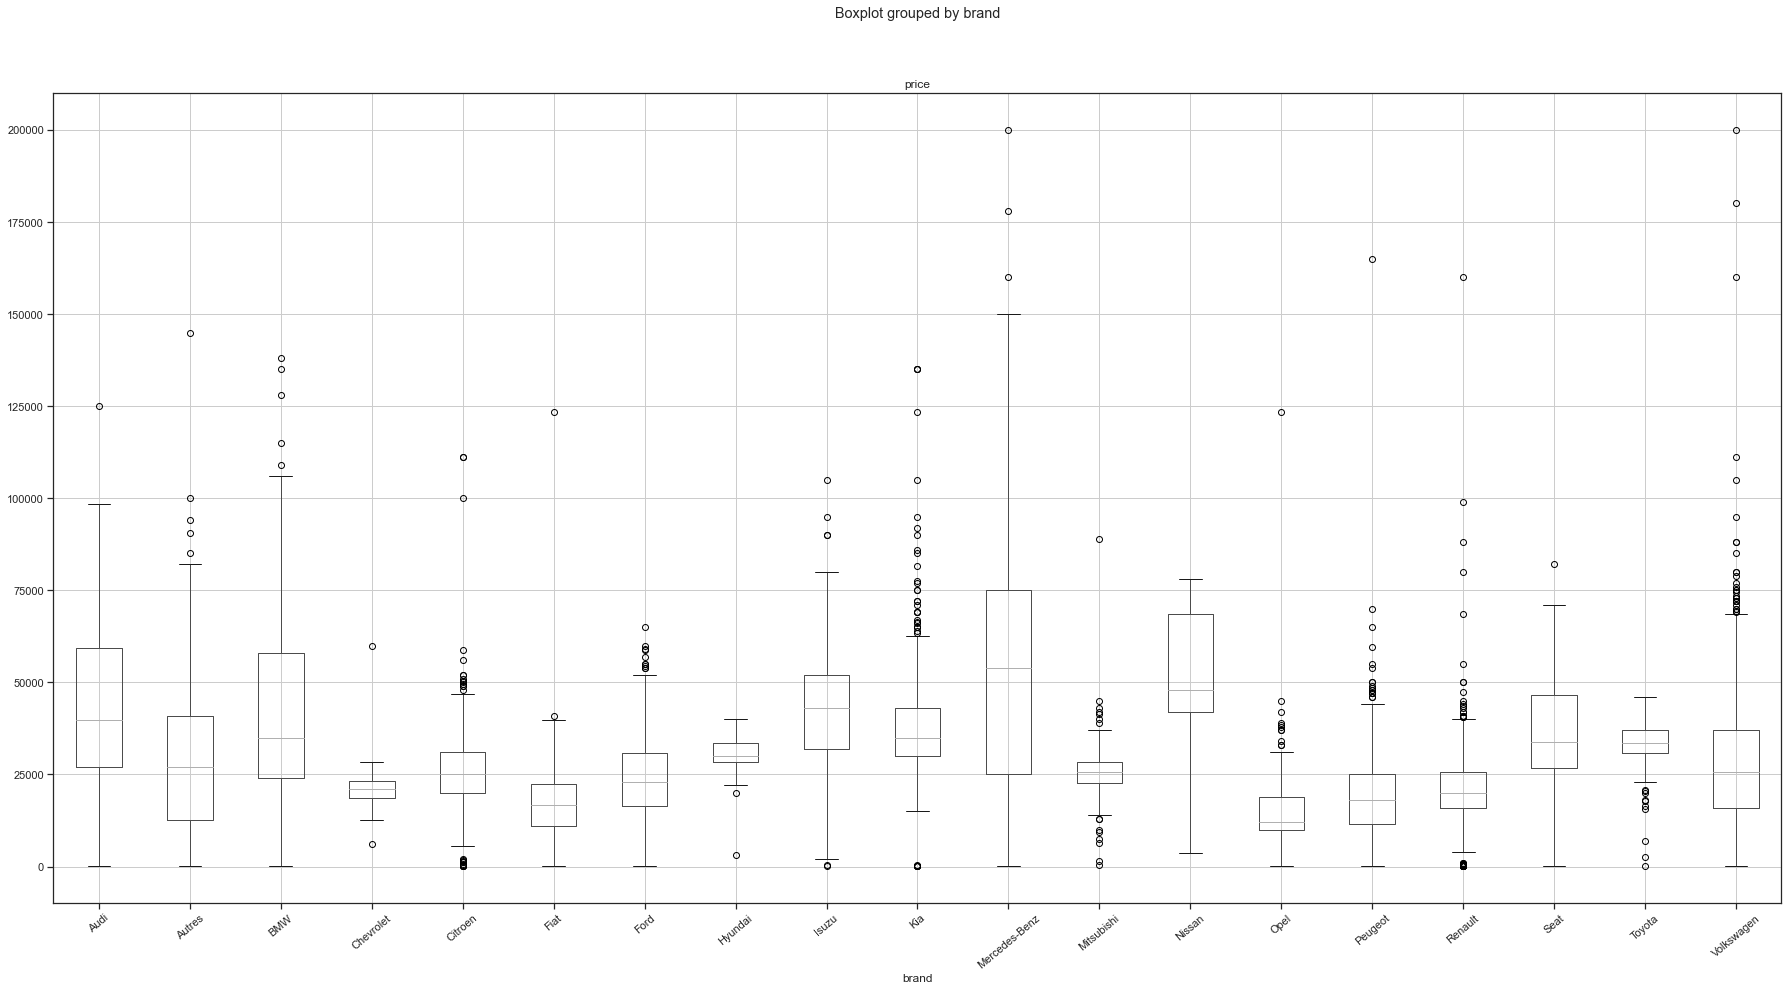

In [202]:

fig, ax = plt.subplots(figsize=(30,15))
plt.suptitle('')

data.boxplot(column=['price'], by='brand', ax=ax)
plt.xticks(rotation=40)


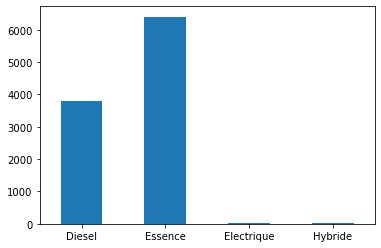

In [44]:
data['Fuel_Type'].value_counts(sort=False).plot.bar(rot=0)



In [ ]:

#Since most of the data points are Diesel and Petrol, we can label other fuel types as Others.

data2 = data
data2.Fuel_Type = data.Fuel_Type.map(lambda x: x if x in ['Diesel','Essence'] else 'Other')
data2.Fuel_Type.unique()
data2.drop(data2[data2.Fuel_Type == "Other"].index, inplace=True)


In [215]:
data = data.groupby('Horse_pow').filter(lambda x: len(x) > 10)
data.Horse_pow.max()

16.0

([<matplotlib.patches.Wedge at 0x15a2b8876d0>,
 [Text(0.9031877530175575, 0.6278948023348304, 'Volkswagen'),
  Text(-0.09433569181437997, 1.0959474336161852, 'Opel'),
  Text(-0.9041974668904562, 0.6264398940591845, 'Peugeot'),
  Text(-1.0881293302143655, -0.1611662518247427, 'Isuzu'),
  Text(-0.8391816284089779, -0.7111780329431276, 'Citroen'),
  Text(-0.5019651752119286, -0.9787905612920764, 'Fiat'),
  Text(-0.18913951040237972, -1.0836172043691206, 'Ford'),
  Text(0.12663800421546387, -1.0926860555019104, 'Audi'),
  Text(0.38373165225798267, -1.030897676326491, 'Renault'),
  Text(0.5659401306824579, -0.9432453384369958, 'Seat'),
  Text(0.7147742834387522, -0.8361206394621643, 'Mitsubishi'),
  Text(0.8433651562191221, -0.7062118756262146, 'Kia'),
  Text(0.9441551998162104, -0.564420905583778, 'Mercedes-Benz'),
  Text(1.0093001675233033, -0.43739361202174887, 'Toyota'),
  Text(1.047142822704266, -0.3368856020356793, 'BMW'),
  Text(1.071379050634729, -0.2492928596270405, 'Autres'),
  Te

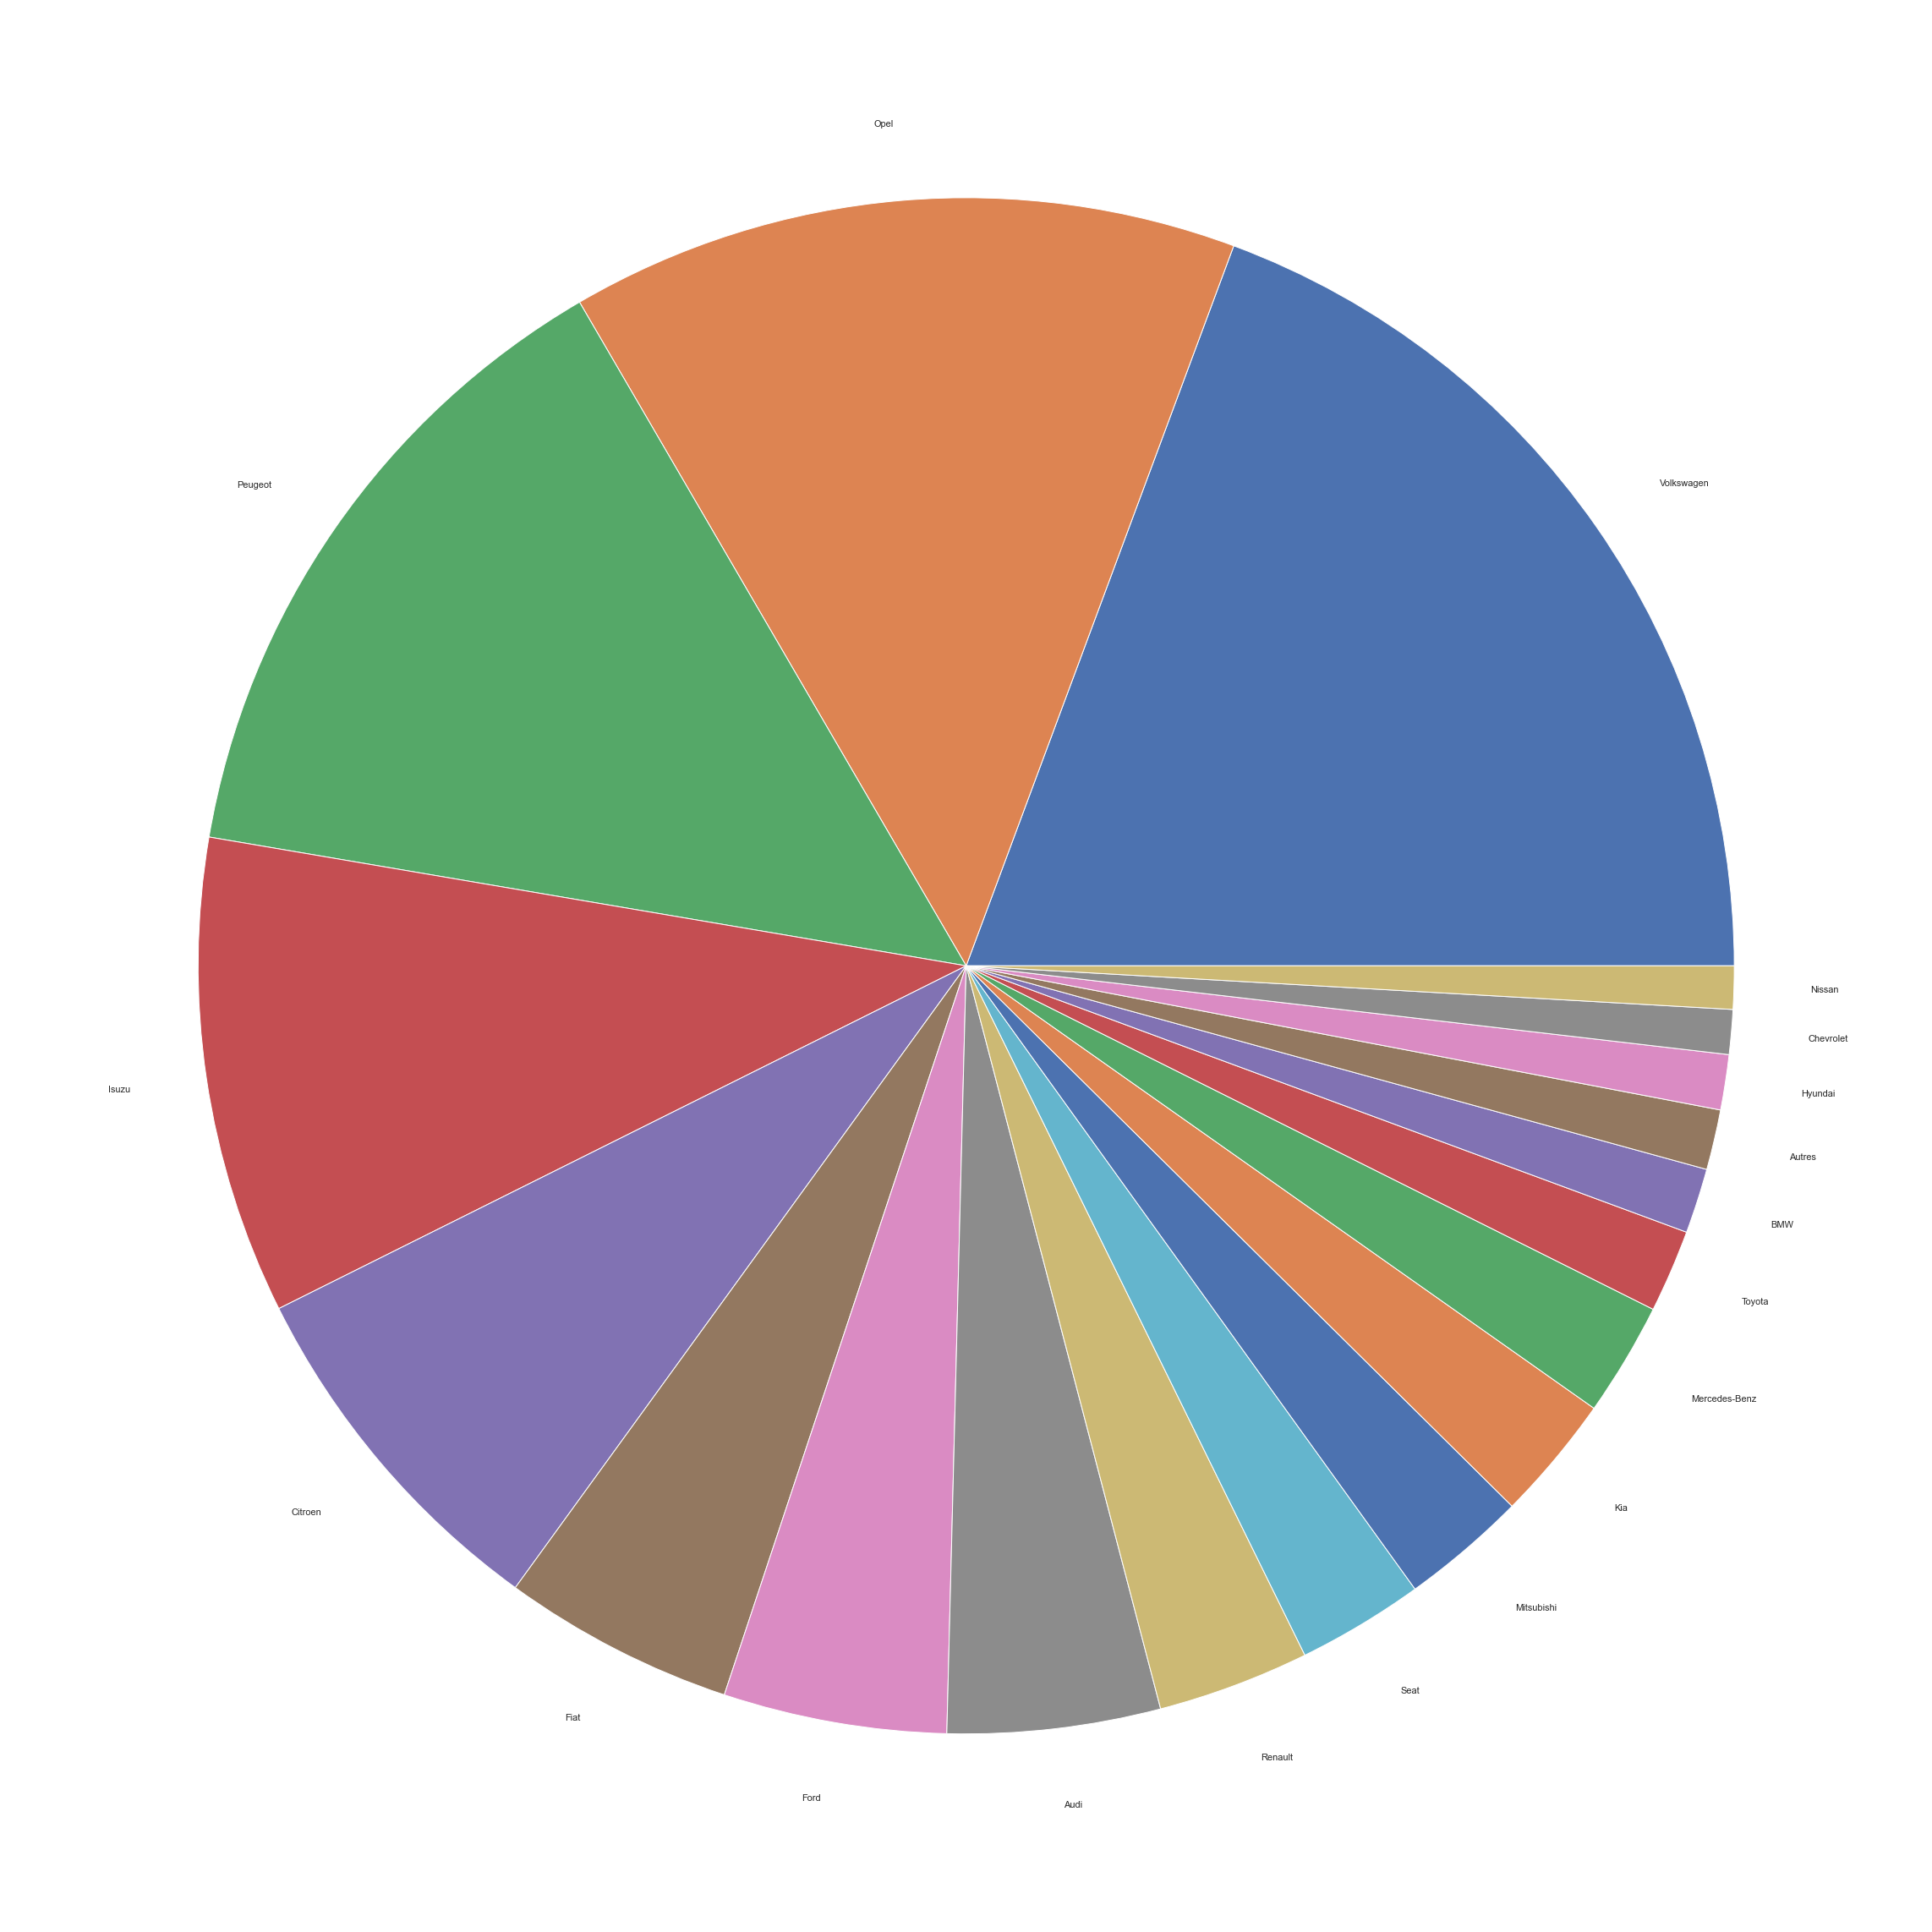

In [201]:
brands=list(data.brand.unique())
brands_count=data.brand.value_counts()
plt.pie(brands_count,labels=brands)


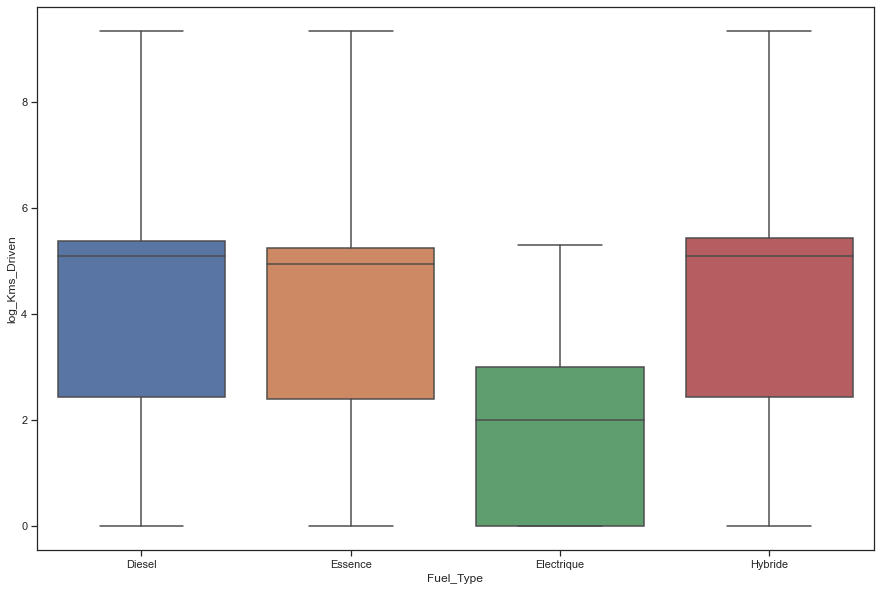

In [177]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Fuel_Type',y='log_Kms_Driven', data=data)

In [4]:

data.head()

,Unnamed: 0,Kms_Driven,year,brand,model,price,Fuel_Type,Horse_pow,city,nb_year,log_price
0,0,1.0,2021,Volkswagen,Polo,12500.0,Diesel,4.0,Ben arous,0,4.096910
1,1,180000.0,2008,Opel,Astra,21500.0,Diesel,1.0,Tunis,13,4.332438
2,2,1.0,2021,Volkswagen,Polo,12500.0,Diesel,4.0,Ben arous,0,4.096910
3,3,180000.0,2008,Opel,Astra,21500.0,Diesel,1.0,Tunis,13,4.332438
4,4,200000.0,1999,Renault,12,111111.0,Essence,4.0,Monastir,22,5.045757


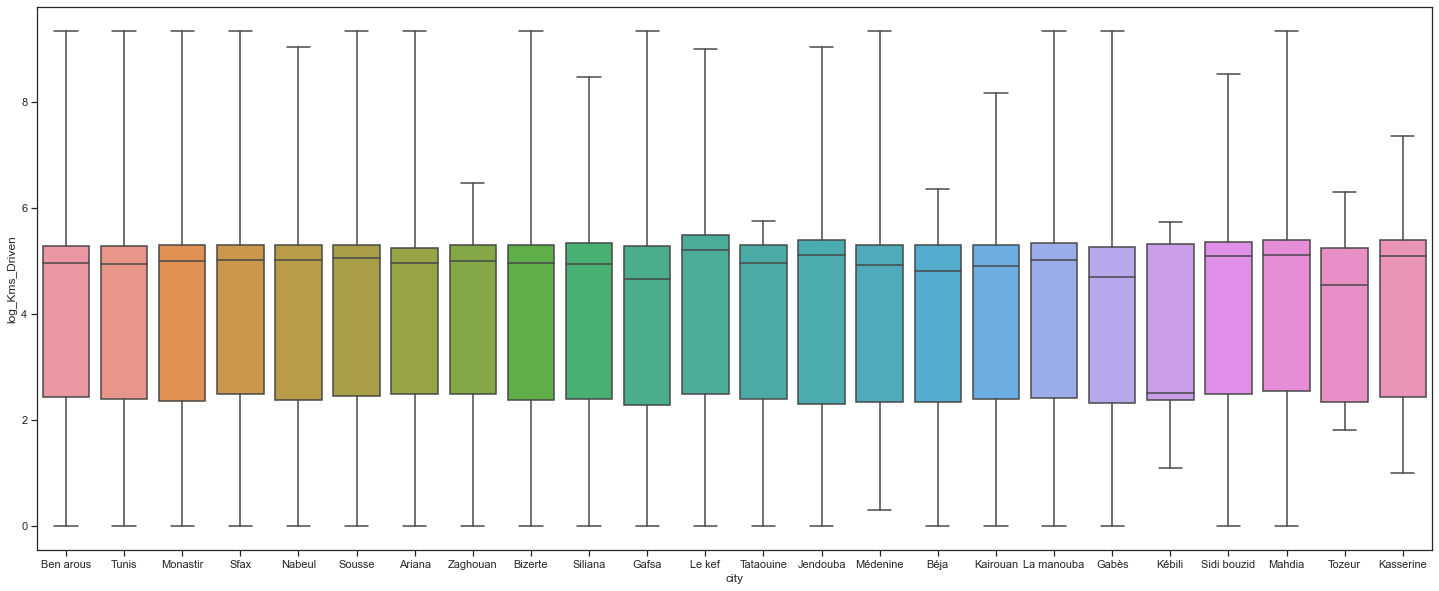

In [179]:
plt.figure(figsize=(25,10))
sns.boxplot(x='city',y='log_Kms_Driven', data=data)

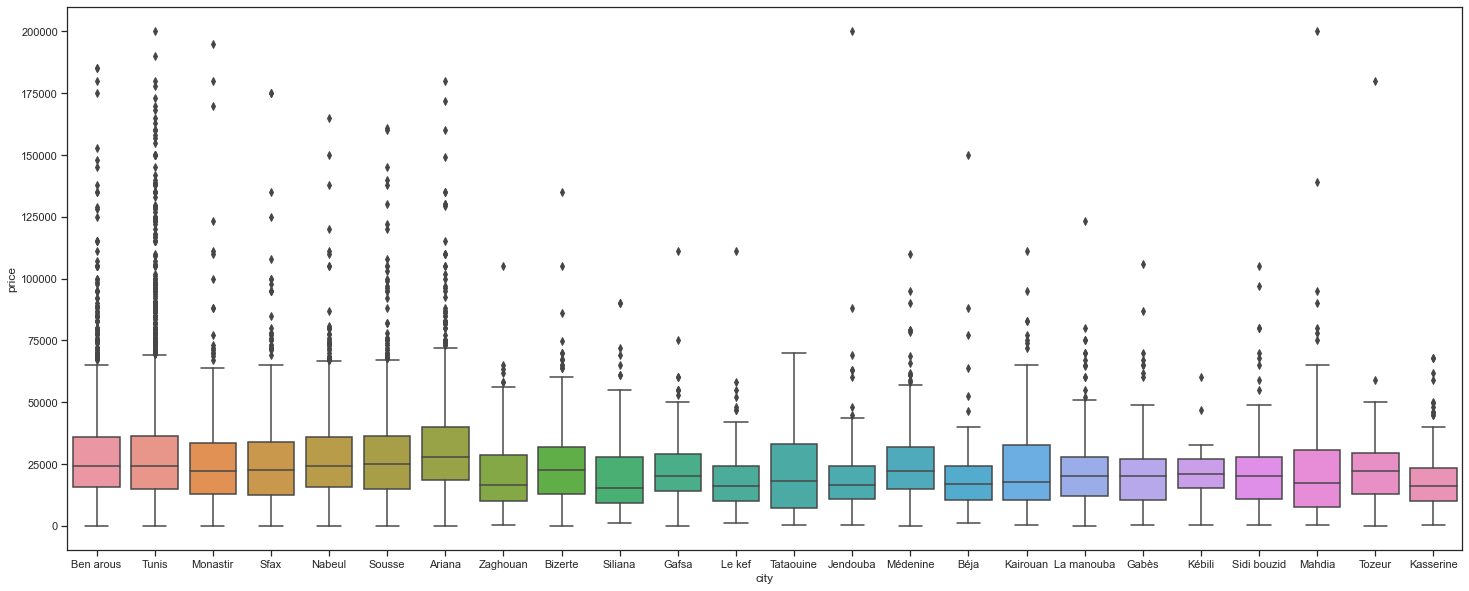

In [180]:
plt.figure(figsize=(25,10))
sns.boxplot(x='city',y='price', data=data)

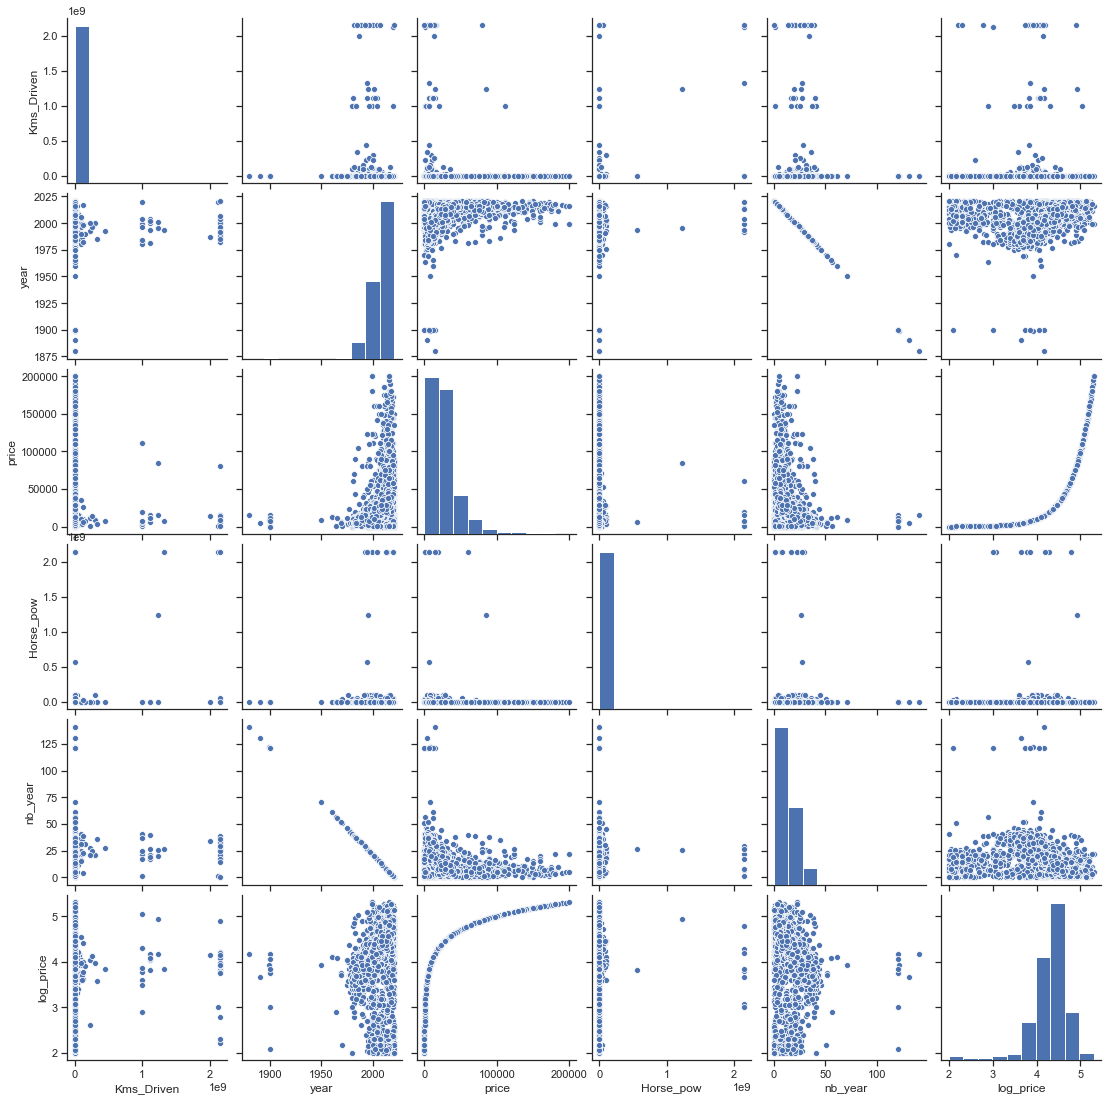

In [184]:

sns.pairplot(data)

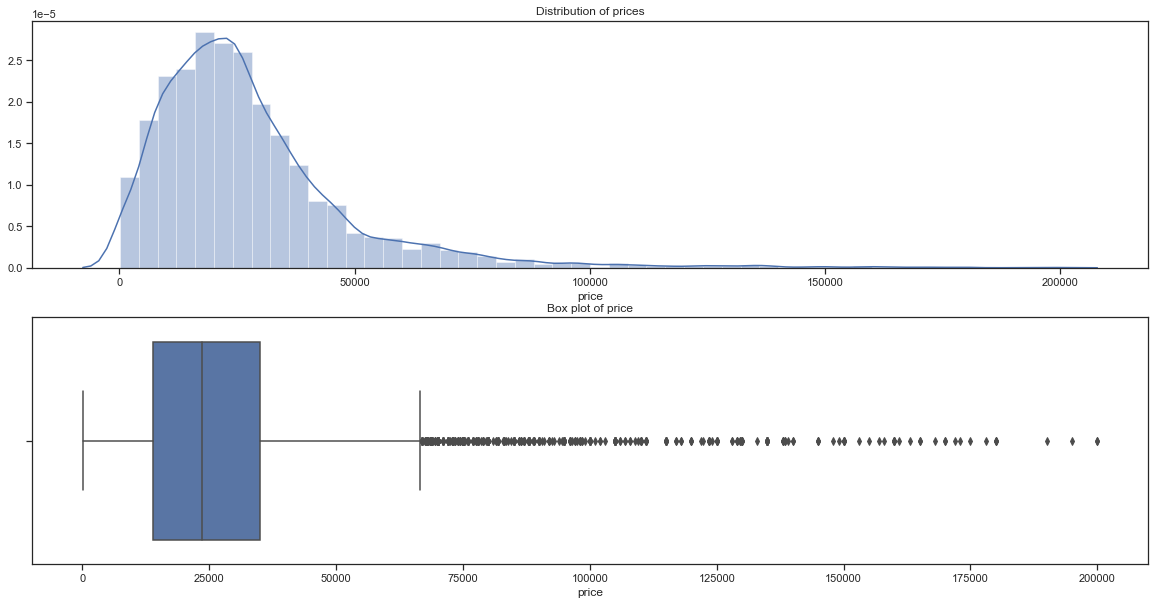

In [190]:
fig, axs = plt.subplots(2, figsize=(20,10))
sns.distplot(data['price'], ax = axs[0])
axs[0].set_title('Distribution of prices')
axs[1].set_title('Box plot of price')
sns.boxplot(x='price', data = data, ax=axs[1])

In [40]:
#Clearly we have some outliers present in kilometers driven and selling price. We need to remove these outliers by using IQR method.
def remove_outlier_price(data):
    temp = pd.DataFrame()
    
    df_price = data['price']
    Q1 = df_price.quantile(0.25)
    Q3 = df_price.quantile(0.75)
    IQR = Q3 - Q1
    df_outlier = df_price[(df_price < (Q1 - 1.5 * IQR)) | (df_price > (Q3 + 1.5 * IQR))]
    temp = pd.concat([temp,df_outlier])
        
    return data.drop(temp.index)

df6 = remove_outlier_price(data)

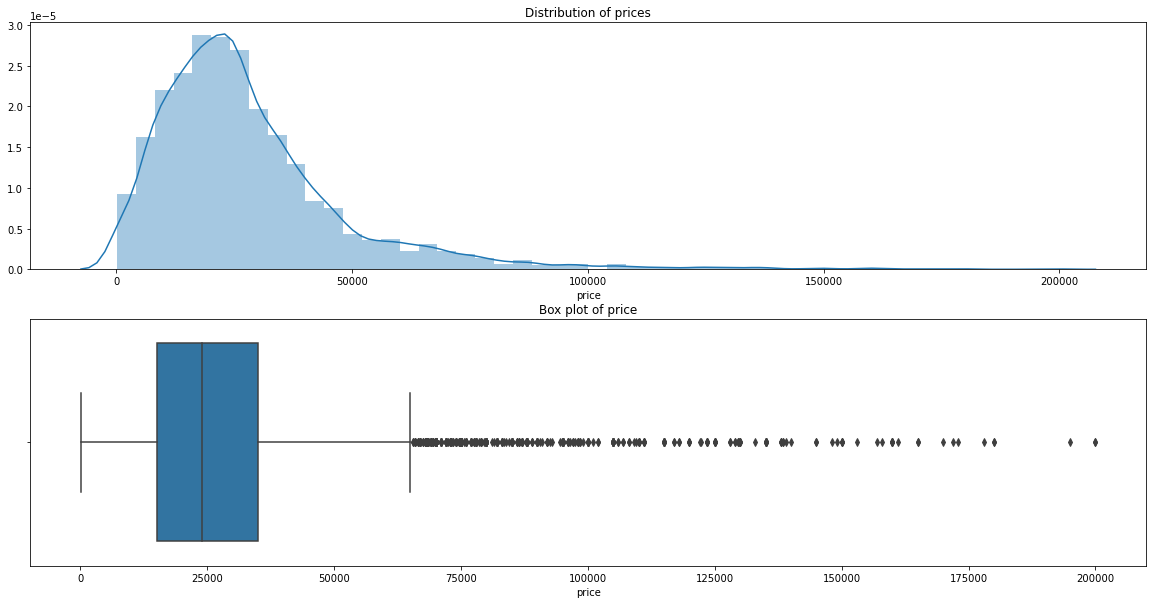

In [41]:
fig, axs = plt.subplots(2, figsize=(20,10))
sns.distplot(data['price'], ax = axs[0])
axs[0].set_title('Distribution of prices')
axs[1].set_title('Box plot of price')
sns.boxplot(x='price', data = data, ax=axs[1])

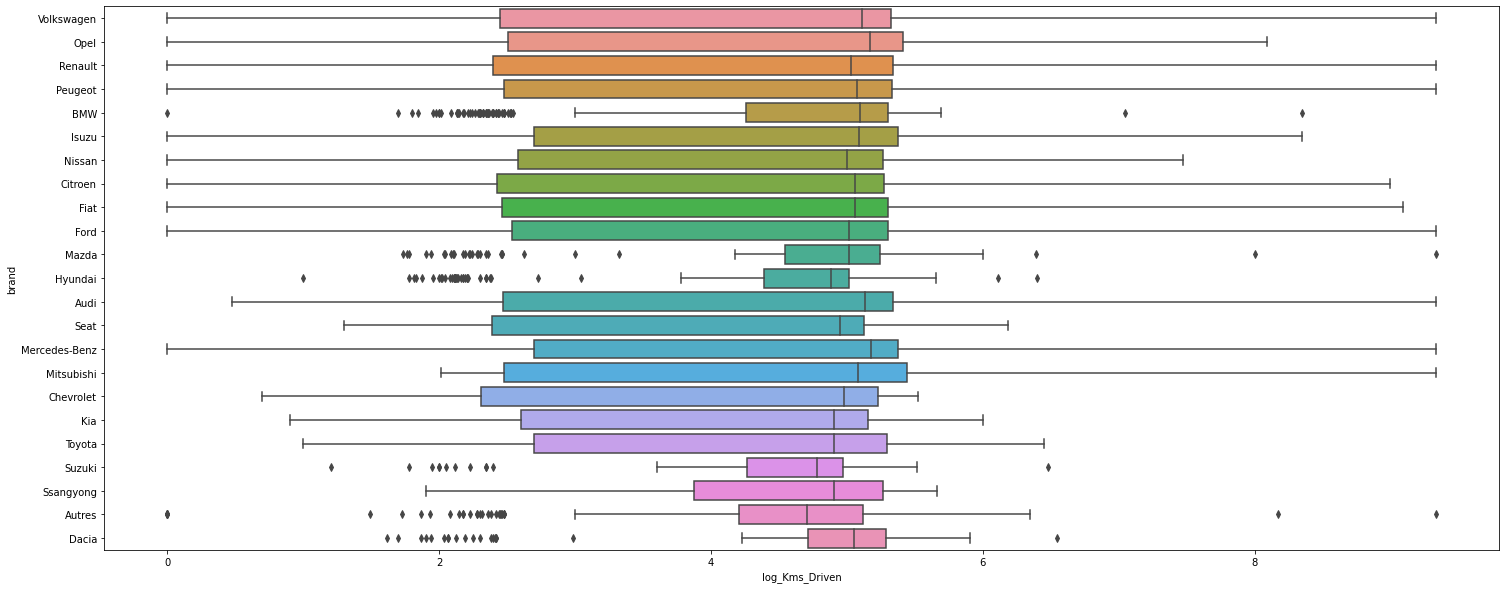

In [38]:
plt.figure(figsize=(25,10))
sns.boxplot(x='log_Kms_Driven',y='brand', data=data)

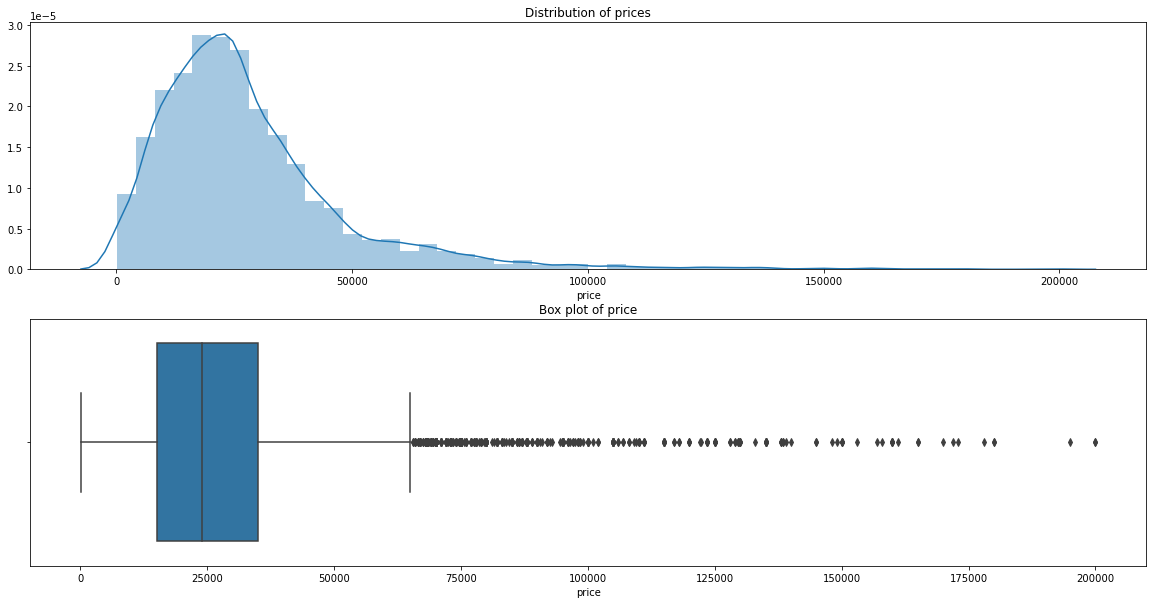

In [39]:
fig, axs = plt.subplots(2, figsize=(20,10))
sns.distplot(data['price'], ax = axs[0])
axs[0].set_title('Distribution of prices')
axs[1].set_title('Box plot of price')
sns.boxplot(x='price', data = data, ax=axs[1])

In [10]:
data = data.groupby('brand').filter(lambda x: len(x) > 50)
data['brand'].value_counts()

Volkswagen       1439
Peugeot          1349
Renault          1202
Citroen           911
Fiat              635
Mercedes-Benz     455
Ford              436
Kia               380
Opel              330
BMW               260
Audi              225
Isuzu             214
Toyota            197
Nissan            185
Hyundai           183
Seat              169
Autres            155
Chevrolet         146
Mazda             135
Mitsubishi        117
Dacia              96
Ssangyong          58
Suzuki             57
Name: brand, dtype: int64

C:\Users\medsa\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


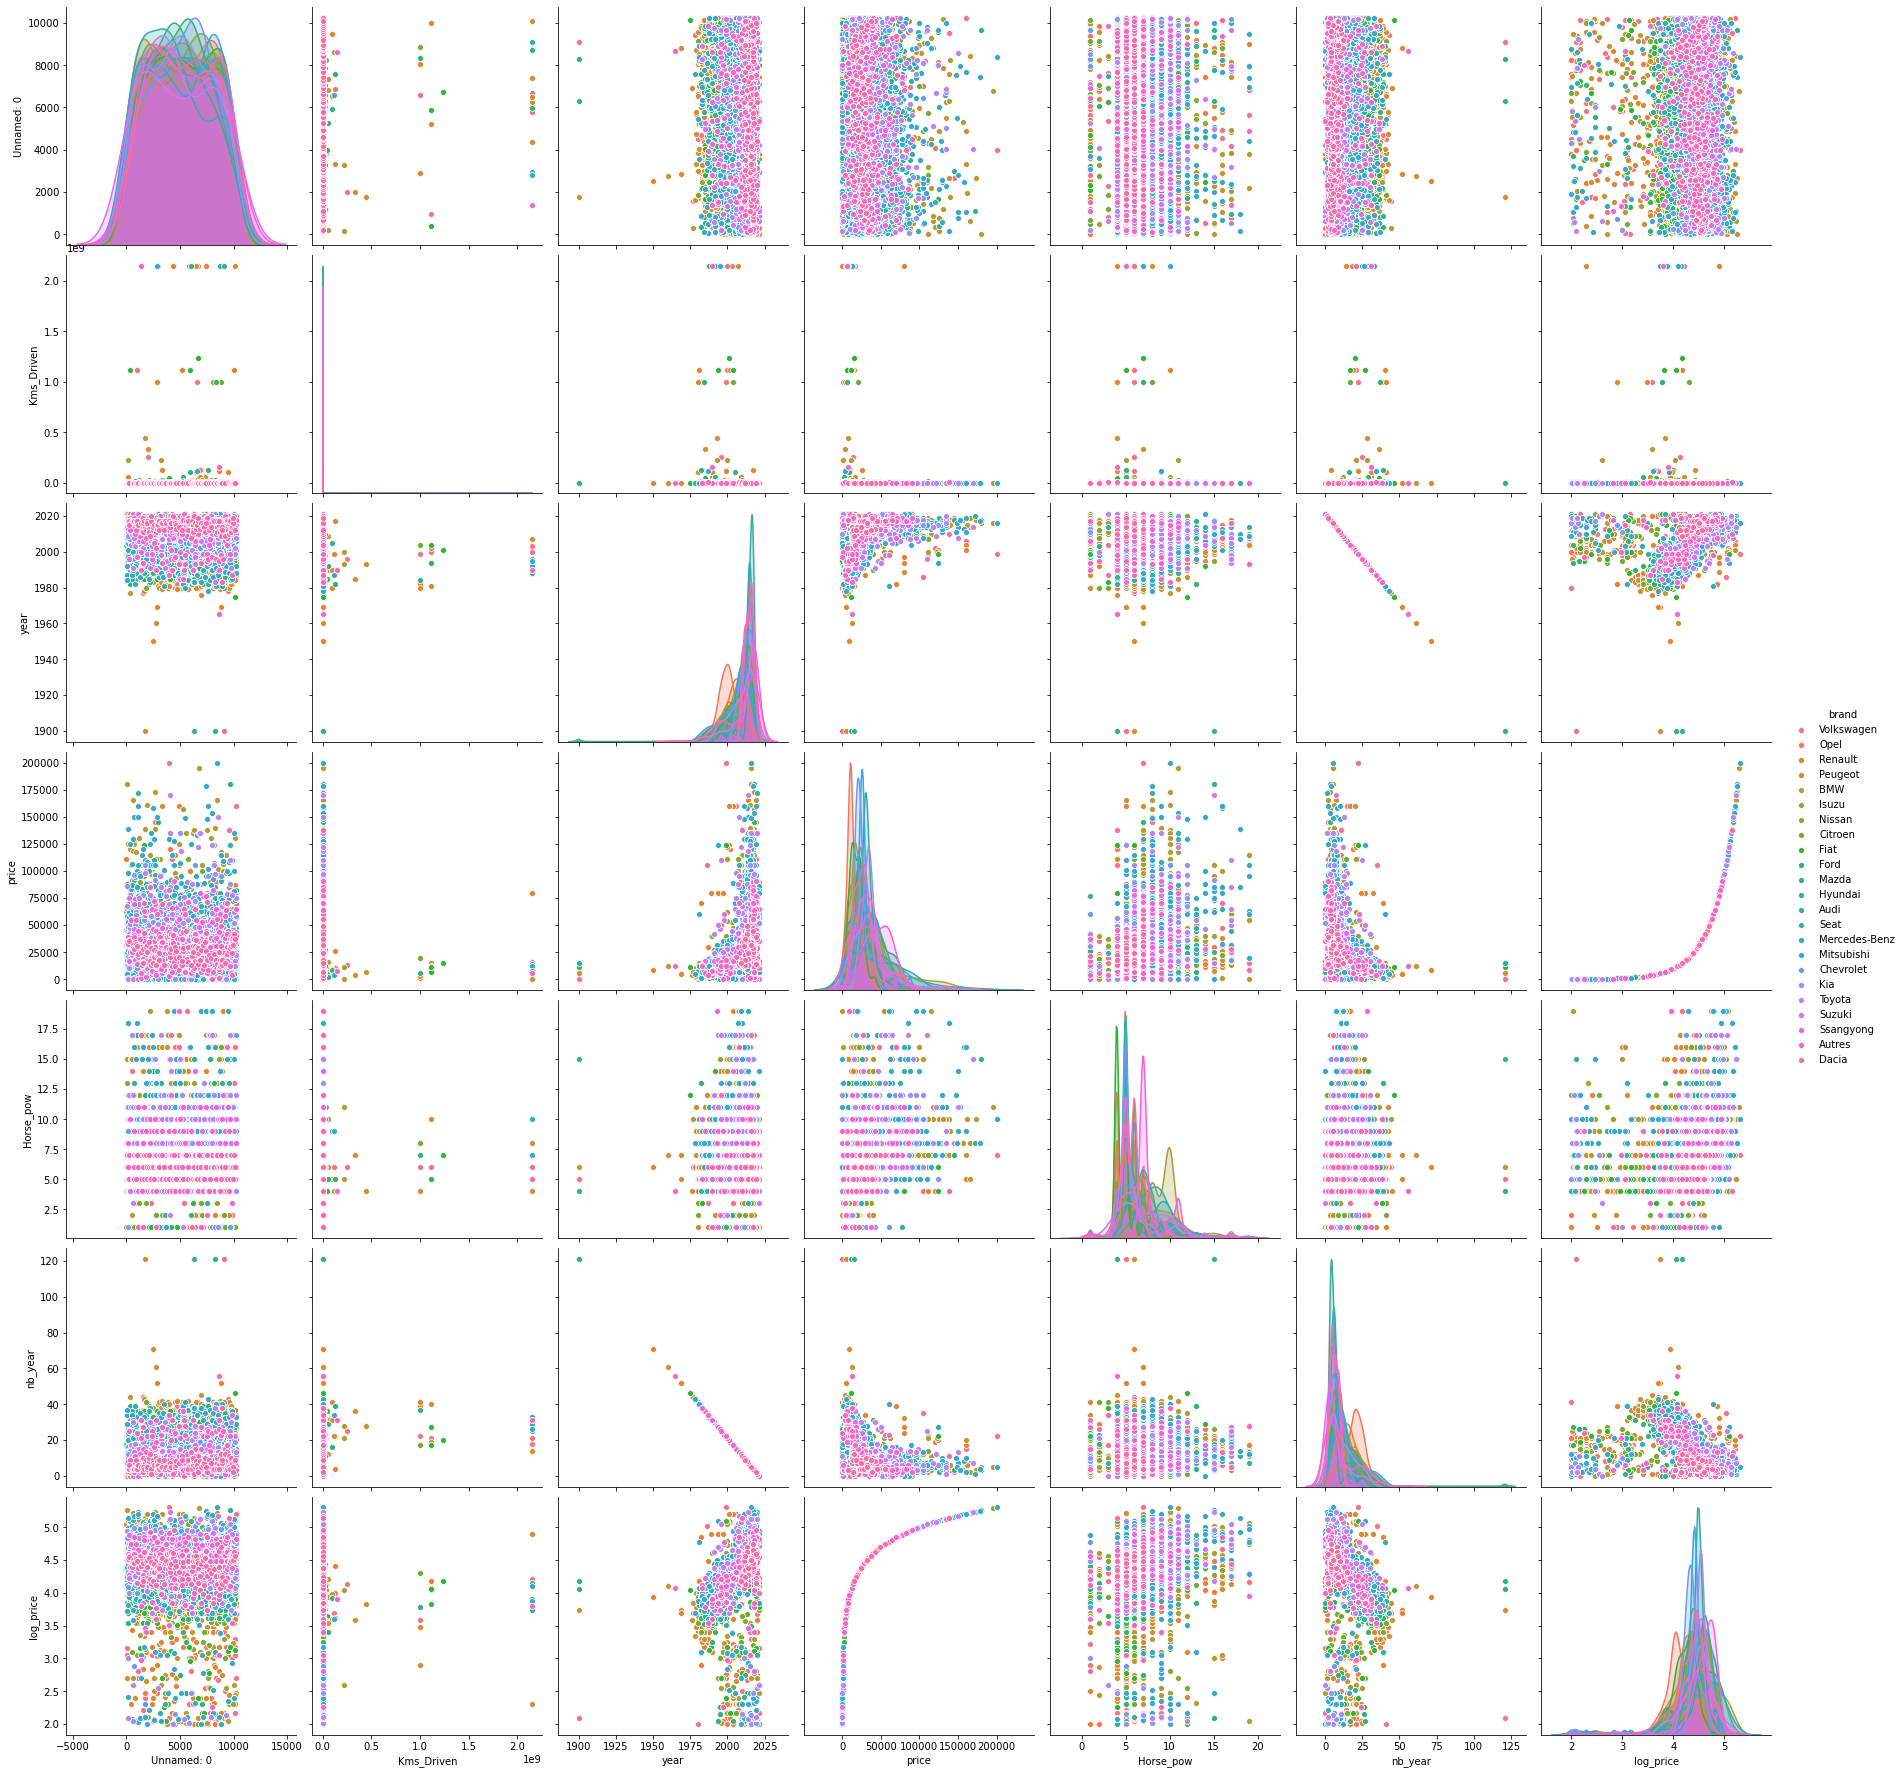

In [4]:

sns.pairplot(data,hue = 'brand',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

In [42]:
#Clearly we have some outliers present in kilometers driven and selling price. We need to remove these outliers by using IQR method.
def remove_outlier_Kms_Driven(data):
    temp = pd.DataFrame()
    
    df_Kms_Driven = data['Kms_Driven']
    Q1 = df_Kms_Driven.quantile(0.25)
    Q3 = df_Kms_Driven.quantile(0.75)
    IQR = Q3 - Q1
    df_outlier = df_Kms_Driven[(df_Kms_Driven < (Q1 - 1.5 * IQR)) | (df_Kms_Driven > (Q3 + 1.5 * IQR))]
    temp = pd.concat([temp,df_outlier])
        
    return data.drop(temp.index)

data = remove_outlier_km_driven(data)

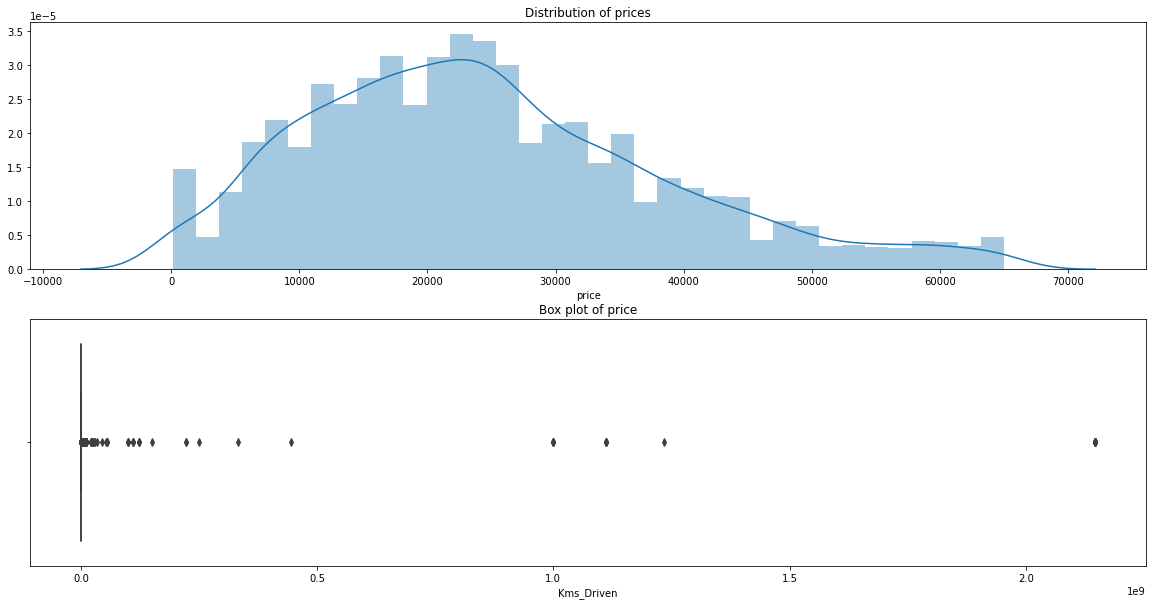

In [43]:
fig, axs = plt.subplots(2, figsize=(20,10))
sns.distplot(data['price'], ax = axs[0])
axs[0].set_title('Distribution of prices')
axs[1].set_title('Box plot of price')
sns.boxplot(x='Kms_Driven', data = data, ax=axs[1])

In [45]:
year_mean_essence = data[data['Fuel_Type']=='Essence'].groupby('year')['price'].mean()
year_mean_diesel = data[data['Fuel_Type']=='Diesel'].groupby('year')['price'].mean()

In [44]:
data.head()

,Unnamed: 0,Kms_Driven,year,brand,model,price,Fuel_Type,Horse_pow,city,nb_year,log_price,log_Kms_Driven
0,0,1.0,2021,Volkswagen,Polo,12500.0,Diesel,4.0,Ben arous,0,4.096910,0.000000
1,1,180000.0,2008,Opel,Astra,21500.0,Diesel,1.0,Tunis,13,4.332438,5.255273
2,2,1.0,2021,Volkswagen,Polo,12500.0,Diesel,4.0,Ben arous,0,4.096910,0.000000
3,3,180000.0,2008,Opel,Astra,21500.0,Diesel,1.0,Tunis,13,4.332438,5.255273
5,5,29000.0,2019,Volkswagen,Polo,45000.0,Essence,5.0,Tunis,2,4.653213,4.462398


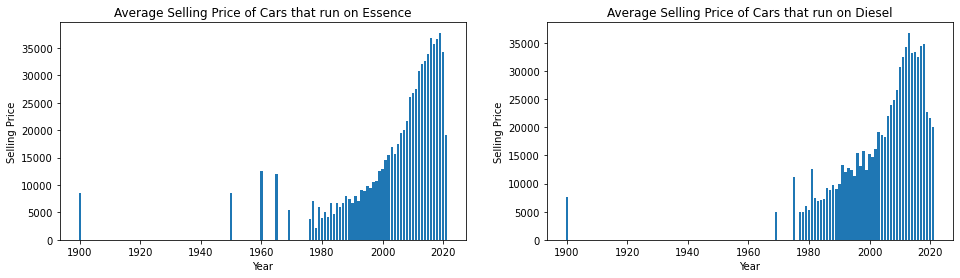

In [50]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

ax[0].bar(year_mean_essence.index,year_mean_essence)
ax[1].bar(year_mean_diesel.index,year_mean_diesel)

ax[0].set_title('Average Selling Price of Cars that run on Essence')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Selling Price')

ax[1].set_title('Average Selling Price of Cars that run on Diesel')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Selling Price')

plt.show()

In [51]:
# we can also safely remove the datapoints before 2005 since it produces inconsistency and the data points
# below 1976 have low value count
data = data[data['year']>1976]


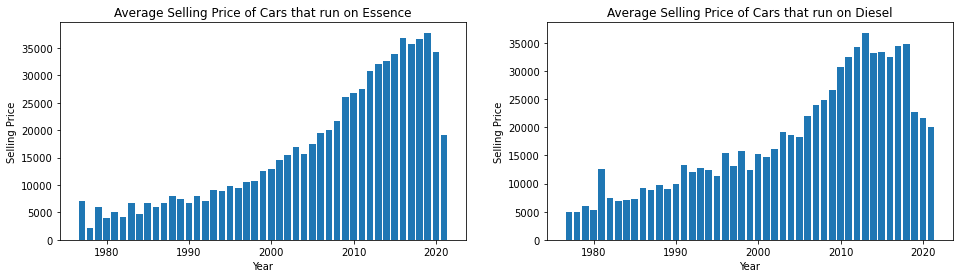

In [55]:
year_mean_essence = data[data['Fuel_Type']=='Essence'].groupby('year')['price'].mean()
year_mean_diesel = data[data['Fuel_Type']=='Diesel'].groupby('year')['price'].mean()

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

ax[0].bar(year_mean_essence.index,year_mean_essence)
ax[1].bar(year_mean_diesel.index,year_mean_diesel)

ax[0].set_title('Average Selling Price of Cars that run on Essence')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Selling Price')

ax[1].set_title('Average Selling Price of Cars that run on Diesel')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Selling Price')

plt.show()

In [ ]:
#We will also remove data points with low kilometers driven but also having low selling price.
#We will be removing data points withkilometers driven one standard deviation below the mean and at the same time
#the selling price below one standard deviation below the mean price. We will be removing data points high kilometers driven and high selling price as well.

In [57]:
def remove_outlier_last_year(df):
    temp = pd.DataFrame()
    for i in sorted(df.year.unique()):
        df_year = df[df['year']==i]
        km = df_year['Kms_Driven']
        price = df_year['price']
        outlier = df_year[(df_year['Kms_Driven']<km.mean()-km.std())&(df_year['price']<price.mean()-price.std()) | (df_year['Kms_Driven']>km.mean()+km.std())&(df_year['price']>price.mean()+price.std())]
        temp = pd.concat([temp,outlier])

    return df.drop(temp.index)
    
df11 = remove_outlier_last_year(data)

In [59]:
essence = df11[df11['Fuel_Type']=='Essence']
diesel = df11[df11['Fuel_Type']=='Diesel']

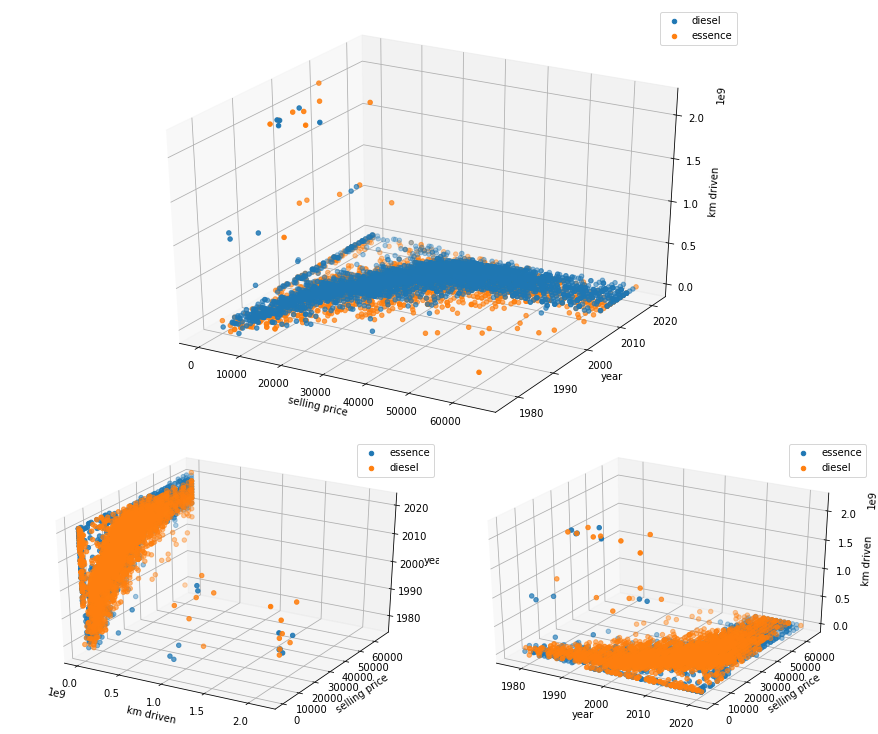

In [61]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_axes([0.2,0,1.5,1.5], projection='3d')

ax.scatter(essence['price'],essence['year'],essence['Kms_Driven'])
ax.scatter(diesel['price'],diesel['year'],diesel['Kms_Driven'])

ax.set_xlabel('selling price')
ax.set_ylabel('year')
ax.set_zlabel('km driven')

ax.legend(['diesel','essence'])

ax=fig.add_axes([0,-1,1,1], projection='3d')

ax.scatter(essence['Kms_Driven'],essence['price'],essence['year'])
ax.scatter(diesel['Kms_Driven'],diesel['price'],diesel['year'])

ax.set_xlabel('km driven')
ax.set_ylabel('selling price')
ax.set_zlabel('year')

ax.legend(['essence','diesel'])

ax=fig.add_axes([1,-1,1,1], projection='3d')

ax.scatter(essence['year'],essence['price'],essence['Kms_Driven'])
ax.scatter(diesel['year'],diesel['price'],diesel['Kms_Driven'])

ax.set_xlabel('year')
ax.set_ylabel('selling price')
ax.set_zlabel('km driven')

ax.legend(['essence','diesel'])

plt.show()

In [64]:
df11.to_csv("cleaned_tayara_cars2.0.csv")